In [ ]:
inputPath = ""

rlePath = ""

# Open the file
f = open(inputPath, "rb")

# Open the mmp file
frle = open(rlePath, "rb")

In [ ]:
f.seek(0)

def readHeader():
    # Check signature
    signature = f.read(6)
    # print("Signature: ", signature)
    if signature != b"IMGRLE":
        print("Signature not found! ", signature)
        return None

    #image type??? 0x01, 0x02, 0x06 means 8bpp, 0x04 means shadow (8bpp but only 2 colors), 0x00, 0x05 means 15bpp(5-5-5), .... ????
    typeVal = int.from_bytes(f.read(1), byteorder='little')
    match typeVal:
        case 0x00:
            type = "15bpp(5-5-5)"
            bpp = 2
        case 0x01:
            type = "8bpp"
            bpp = 1
        case 0x02:
            type = "8bpp"
            bpp = 1
        case 0x04:
            type = "8bpp shadow (8bpp but only 2 colors)"
            bpp = 1
        case 0x05:
            type = "15bpp(5-5-5)"
            bpp = 2
        case 0x06:
            type = "8bpp"
            bpp = 1
        case _:
            type = "unknown"
            bpp = 2

    # always (?) 11 x 0x00 bytes
    unknown = f.read(11)
    for b in unknown:
        if b != 0:
            print("Different value found! ", unknown)
            break

    # number of image frames stripped horizontally (directions)
    imagesNumX = int.from_bytes(f.read(4), byteorder='little')

    # number of image frames stripped vertically (animation)
    imagesNumY = int.from_bytes(f.read(4), byteorder='little')

    return {
        "signature": signature,
        "type": type,
        "typeVal" : typeVal,
        "bpp" : bpp,
        "directions": imagesNumX,
        "animFrames": imagesNumY
    }

def readRLEHeader():

    # width of the background strip on the left, before graphics
    leftBGmargin = int.from_bytes(f.read(4), byteorder='little')

    # height of the background strip on the top, before graphics
    topBGmargin = int.from_bytes(f.read(4), byteorder='little')

    # width of the frame INCLUDING background strips, -1 pixel
    width = int.from_bytes(f.read(4), byteorder='little')

    # height of the frame INCLUDING background strips, -1 pixel
    height = int.from_bytes(f.read(4), byteorder='little')

    # "RLE2"
    rle2 = f.read(4)
    # print("RLE2: ", rle2)
    if rle2 != b"RLE2":
        print("RLE2 not found! found:", rle2)
        return None

    # width of the single frame (excluding background strips)
    frameWidth = int.from_bytes(f.read(4), byteorder='little')

    # height of the single frame (excluding background strips)
    frameHeight = int.from_bytes(f.read(4), byteorder='little')

    # some kind of type??? Usually 0x01, rarely 0x03 ... TODO: 2?
    type = int.from_bytes(f.read(2), byteorder='little')

    # frame size, in bytes, including indexes
    frameSize = int.from_bytes(f.read(4), byteorder='little')

    # always (?) 8 x 0x00 bytes 
    unknown = f.read(8)
    for b in unknown:
        if b != 0:
            print("Different value found! ", unknown)
            break

    # background color, 15bpp(5-5-5) or index in palette
    bgColor = int.from_bytes(f.read(4), byteorder='little')

    return {
        "leftBGmargin": leftBGmargin,
        "topBGmargin": topBGmargin,
        "width": width,
        "height": height,
        "rle2": rle2,
        "frameWidth": frameWidth,
        "frameHeight": frameHeight,
        "type": type,
        "frameSize": frameSize,
        "bgColor": bgColor
    }


# header = readHeader()
# if header is None:
#     print("Header not found!")
#     exit(1)

# for el, value in header.items():
#     print(el, ": ", value)

# print("")

# if header["type"] == 0x01 or header["type"] == 0x02 or header["type"] == 0x04 or header["type"] == 0x06: # 8bpp
#     BPP = 1
# elif header["type"] == 0x00 or header["type"] == 0x05:
#     BPP = 2inputPath = "/GAUL1.RLE"

# maxFrameW = 0
# maxFrameH = 0

# for i in range(numFiles):
#     print("File ", i, ":")
#     rleHeader = readRLEHeader()

#     if rleHeader is None:
#         print("RLE header not found!")
#         break
#     for el, value in rleHeader.items():
#         print(el, ": ", value)
#     print("")

#     continue

#     width = rleHeader["width"] + 1
#     height = rleHeader["height"] + 1

#     if maxFrameW < width:
#         maxFrameW = width

#     if maxFrameH < height:
#         maxFrameH = height

#     # Initialize image buffer
#     buffer = bytearray(width * height * BPP)

#     for y in range(height):
#         for x in range(width):
#             if BPP == 1:
#                 if header["type"] == 0x04:
#                     buffer [y * width + x] = 0
#                 else:
#                     buffer [y * width + x] = 64
#             else:
#                 buffer [(y * width + x) * BPP] = rleHeader["bgColor"] & 0xFF
#                 if BPP == 2:
#                    rleHeader = readRLEHeader() buffer [(y * width + x) * BPP + 1] = rleHeader["bgColor"] >> 8


#     f.seek(rleHeader["offset"], 0)

#     r = f.read(2 * rleHeader["frameHeight"])
#     print("Test: ", r)

#     # linesOffsets = [] * rleHeader["frameHeight"] + 1

#     # read table of offsets to each image line. LinesOffsets[X] + HeaderSize(26bytes) + FrameHeaderSize(46bytes) = position in file where line data starts
#     # r = ReadFile( hMmpFile, LinesOffsets, fhdr[frame].FrameHeight * sizeof(WORD), &br, NULL ); //read table of offsets to each image line. LinesOffsets[X] + HeaderSize(26bytes) + FrameHeaderSize(46bytes) = position in file where line data starts
# 	# 	if ( !r || br < fhdr[frame].FrameHeight * sizeof(WORD) )
# 	# 	{
# 	# 		cout << "FAILED!\n"; GetError(); cout << "\n";
# 	# 		goto clean;
# 	# 	} 

#     lineOffsets = f.read(2 * rleHeader["frameHeight"])
#     print("LineOffsets: ", lineOffsets)
#     continue

# # Print the current position in the file
# print(f.tell())
    inputPath = ""

# # pamm = f.read(4)
# # print("PAMM: ", pamm)

# # offset = int.from_bytes(f.read(2), byteorder='little')
# # print("Offset: ", offset)


In [91]:
f.seek(0)

# Read Header
header = readHeader()
if header is None:
    print("Header not found!")
    exit(1)

# Print header
for el, value in header.items():
    print(el, ": ", value)
print("")

# Read RLE header
rleHeader = readRLEHeader()
if rleHeader is None:
    print("RLE header not found!")
    exit(1)

# Print RLE header
for el, value in rleHeader.items():
    print(el, ": ", value)
print("")


ImgDataW = 0
maxFrameW = 0
maxFrameH = 0

for frame in range(header["directions"] * header["animFrames"]):

    # Read additional offset header
    pamm = f.read(4)
    if (pamm != b'pamm'):
        print(f"PAMM not found! found: {pamm}")
        exit(1)
    else:
        print("PAMM found!")

    offset = int.from_bytes(f.read(4), byteorder='little')
    
    print("Offset: ", offset)

    if maxFrameW < rleHeader["width"] + 1:
        maxFrameW = rleHeader["width"] + 1

    if maxFrameH < rleHeader["height"] + 1:
        maxFrameH = rleHeader["height"] + 1

    # Create a buffer and fill it with the background
    frame = [0]*rleHeader["height"]*rleHeader["width"]
    for iy in range(rleHeader["height"]):
        for ix in range(rleHeader["width"]):
            if header["bpp"] == 1:
                if header["typeVal"] == 0x04:
                    frame[iy * rleHeader["width"] + ix] = 0
                else:
                    frame[iy * rleHeader["width"] + ix] = 64
            else:
                frame[iy * rleHeader["width"] + ix] = rleHeader["bgColor"] & 0xFF
                if header["bpp"] == 2:
                    frame[iy * rleHeader["width"] + ix] += (rleHeader["bgColor"] >> 8) << 8
    
    frle.seek(offset)

    #read table of offsets to each image line. LinesOffsets[X] + HeaderSize(26bytes) + FrameHeaderSize(46bytes) = position in file where line data starts
    
    # Read the line offsets
    LinesOffsets = []
    for i in range(rleHeader["frameHeight"]):
        lineoffset = int.from_bytes(frle.read(2), byteorder='little')
        LinesOffsets.append(lineoffset)
    LinesOffsets.append(rleHeader["frameSize"])
    print(f"Line offsets: {LinesOffsets}")

    for y in range(rleHeader["frameHeight"]):

        LineSize = LinesOffsets[y+1] - LinesOffsets[y]

        LineBuf = []
        for j in range(LineSize):
            LineBuf.append(int.from_bytes(f.read(1), byteorder='little'))

        bg = True
        x = rleHeader["leftBGmargin"]

        for pos in range(LineSize):
            
            if bg:
                x += LineBuf[pos]
                bg = False
            else:
                pixels = LineBuf[pos]
                pos+=1

                for p in range(pixels):
                    if LineBuf[pos] == 0:
                        LineBuf[pos] = rleHeader["bgColor"] & 0xFF
                    frame[(y + rleHeader["topBGmargin"]) * (rleHeader["width"] + 1) + x] = LineBuf[pos]
                    pos+=1
                    x+=1
                bg = True





    # Convert the frame to an image
    from PIL import Image
    import matplotlib.pyplot as plt

    img = Image.new('RGB', (rleHeader["width"], rleHeader["height"]), color=(0, 0, 0))

    for y in range(rleHeader["height"]):
        for x in range(rleHeader["width"]):
            if header["bpp"] == 1:
                color = (frame[y * rleHeader["width"] + x],) * 3
            else:
                val = frame[y * rleHeader["width"] + x]
                color = (val & 0xFF, (val >> 8) & 0xFF, (val >> 16) & 0xFF)
            img.putpixel((x, y), color)

    # Show the image
    plt.imshow(img)
    plt.show()

    break


signature :  b'IMGRLE'
type :  8bpp
typeVal :  2
bpp :  1
directions :  1
animFrames :  4

leftBGmargin :  69
topBGmargin :  115
width :  499
height :  407
rle2 :  b'RLE2'
frameWidth :  431
frameHeight :  293
type :  1
frameSize :  62201
bgColor :  161

PAMM found!
Offset:  260733410
Line offsets: [586, 593, 603, 618, 638, 662, 689, 717, 747, 782, 821, 863, 907, 953, 1001, 1052, 1105, 1158, 1215, 1273, 1334, 1397, 1464, 1536, 1610, 1684, 1761, 1842, 1924, 2007, 2091, 2178, 2266, 2357, 2448, 2537, 2627, 2720, 2815, 2913, 3012, 3117, 3224, 3335, 3448, 3564, 3683, 3806, 3933, 4064, 4198, 4334, 4475, 4618, 4762, 4909, 5069, 5241, 5419, 5607, 5803, 6005, 6212, 6424, 6641, 6865, 7093, 7325, 7561, 7799, 8039, 8277, 8514, 8752, 8990, 9226, 9463, 9699, 9934, 10170, 10404, 10637, 10871, 11105, 11338, 11569, 11799, 12030, 12260, 12488, 12719, 12950, 13181, 13413, 13644, 13875, 14111, 14353, 14605, 14860, 15115, 15369, 15625, 15883, 16141, 16403, 16664, 16926, 17189, 17450, 17709, 17975, 18241, 18

IndexError: list index out of range

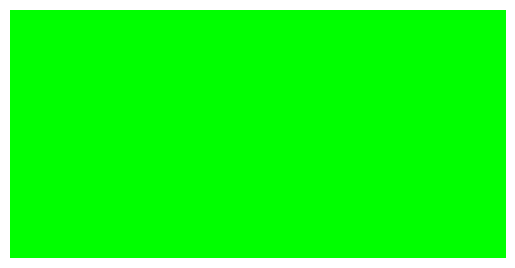

In [64]:
from PIL import Image

import matplotlib.pyplot as plt

# Create a 200x100 image with green color (RGB: 0, 255, 0)
img = Image.new("RGB", (200, 100), (0, 255, 0))

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

In [65]:
# f.seek(120)

lineOffsets = []

for j in range(rleHeader["frameHeight"]):
    # Read the line offset
    lineOffset = int.from_bytes(f.read(2), byteorder='little')
    print("LineOffset: ", lineOffset)
    lineOffsets.append(lineOffset)

print("LineOffsets: ", lineOffsets)

for i in range(lineOffsets - 1):

    lineSize = lineOffsets[i + 1] - lineOffsets[i]

    f.seek(lineOffsets[i] + 26 + 46, 0)

    

LineOffset:  69
LineOffset:  0
LineOffset:  115
LineOffset:  0
LineOffset:  499
LineOffset:  0
LineOffset:  407
LineOffset:  0
LineOffset:  19538
LineOffset:  12869
LineOffset:  431
LineOffset:  0
LineOffset:  293
LineOffset:  0
LineOffset:  1
LineOffset:  62261
LineOffset:  0
LineOffset:  0
LineOffset:  0
LineOffset:  0
LineOffset:  0
LineOffset:  161
LineOffset:  0
LineOffset:  24944
LineOffset:  28013
LineOffset:  27867
LineOffset:  3979
LineOffset:  69
LineOffset:  0
LineOffset:  115
LineOffset:  0
LineOffset:  499
LineOffset:  0
LineOffset:  407
LineOffset:  0
LineOffset:  19538
LineOffset:  12869
LineOffset:  431
LineOffset:  0
LineOffset:  293
LineOffset:  0
LineOffset:  1
LineOffset:  62241
LineOffset:  0
LineOffset:  0
LineOffset:  0
LineOffset:  0
LineOffset:  0
LineOffset:  161
LineOffset:  0
LineOffset:  24944
LineOffset:  28013
LineOffset:  24592
LineOffset:  3980
LineOffset:  69
LineOffset:  0
LineOffset:  115
LineOffset:  0
LineOffset:  499
LineOffset:  0
LineOffset:  40

TypeError: unsupported operand type(s) for -: 'list' and 'int'

In [ ]:
for i in range(628):
    f.seek(i, 0)

    lineOffsets = []

    for j in range(rleHeader["frameHeight"]):
        # Read the line offset
        lineOffset = int.from_bytes(f.read(2), byteorder='little')
        # print("LineOffset: ", lineOffset)
        lineOffsets.append(lineOffset)

    # Check if each value is bigger than the previous one4
    ok = True
    last = -1
    for el in lineOffsets:
        if el <= last:
            # print("LineOffset not increasing: ", lineOffsets)
            ok = False
            break
        last = el

    if ok and len(lineOffsets) > 0:
        print(i, "LineOffset increasing: ", lineOffsets)


70 LineOffset increasing:  [0, 16, 60, 120, 192, 264, 328, 390]
72 LineOffset increasing:  [16, 60, 120, 192, 264, 328, 390, 470]
74 LineOffset increasing:  [60, 120, 192, 264, 328, 390, 470, 2827]
76 LineOffset increasing:  [120, 192, 264, 328, 390, 470, 2827, 5250]
586 LineOffset increasing:  [7397, 10568, 13738, 15819, 16876, 16908, 17965, 18989]
588 LineOffset increasing:  [10568, 13738, 15819, 16876, 16908, 17965, 18989, 21103]


In [ ]:
f.close()